# **What is PyTorch?**
 PyTorch is a library for Python programs that make it easy to create deep learning models.

 Like Python does for programming, PyTorch provides a great introduction to deep learning.

 At the same time, PyTorch has proven to be fully qualified for use in professional contexts for high-level real-world work.



---


The predefined models can be found in torchvision.models:



In [9]:
from torchvision import models
dir(models)

#added a new line of code for the upcoming data preprocessing step.
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])



# **AlexNet**
To run the AlexNet architecture on an input image, we can create an instance of the AlexNet class. Here's how to do it:

In [10]:
alexnet = models.AlexNet()


# **ResNet**
By using the resnet101 method, we can now instantiate a 101-layer convolutional neural network. Now let’s create an instance of the network. We’re going to pass an argument that will ask the function to download the resnet101 weights formed on the ImageNet dataset, with 1.2 million images and 1000 categories:

In [11]:
resnet = models.resnet101(pretrained=True)
resnet


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

 we need to **preprocess** the input images so that they are the correct size and their values ​​(colours) are roughly in the same numeric range. To do this, we need to use the **torchvision module** which provides transformations, which will allow us to quickly define pipelines of basic preprocessing functions:

In [12]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

# **Image Recognition**
Now we can use an image for the image recognition task using our model.

 I took a picture of a dog. We can start by loading an image from the local filesystem using Pillow, an image manipulation module for Python:

Saving dog.png to dog (1).png


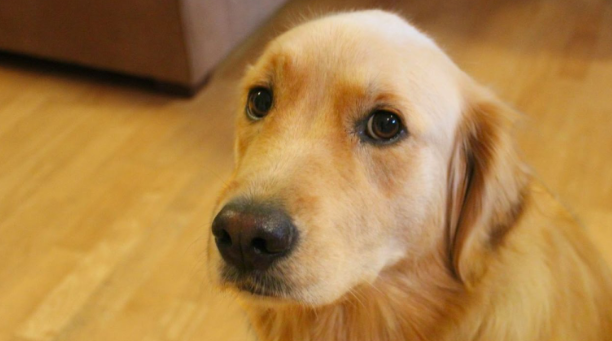

In [13]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("dog.png")
img



---

Next, we need to pass the image through ourpreprocessing pipeline for image recognition:

Now, we need to convert the image to RGB, removing the alpha channel before preprocessing.

Before applying preprocess(img), do this:



In [15]:
from PIL import Image

# If img is a PIL image:
if img.mode != 'RGB':
    img = img.convert('RGB')


In [16]:
img_t = preprocess(img)

In [17]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-3.3981e+00, -1.7692e+00, -2.7772e+00, -3.4068e+00, -3.4501e+00,
         -1.6403e+00, -2.1971e+00, -2.2618e+00, -9.7006e-01, -2.5616e+00,
         -1.6663e+00, -1.5648e+00, -2.7486e+00, -3.1384e+00, -2.6633e+00,
         -2.8809e+00, -3.3081e+00, -9.6871e-01, -8.8955e-01, -1.0530e+00,
         -2.9965e+00, -3.6911e+00, -2.5995e+00, -1.1772e+00, -1.4185e+00,
         -9.3192e-01, -2.9443e+00, -2.2241e+00, -2.0188e+00, -2.9999e+00,
         -3.4887e+00, -1.7807e+00, -1.6547e+00, -2.0100e+00, -1.9054e+00,
         -3.0443e+00, -9.5716e-01, -8.9769e-01, -1.4691e+00, -1.4866e+00,
         -8.9372e-01, -1.7026e+00,  1.0373e+00, -1.9508e-02, -1.9940e+00,
         -1.3078e+00,  2.2317e-01, -1.2665e+00, -2.8979e+00, -3.0082e+00,
         -2.7536e+00, -2.0084e+00, -1.6464e+00, -1.7113e+00, -1.6897e+00,
         -1.6684e+00, -7.5872e-01, -1.9459e+00, -3.3823e+00, -6.4447e-01,
         -4.5959e-01, -1.3230e+00, -8.6081e-01, -1.4038e+00, -1.8193e+00,
         -2.2971e+00, -1.7168e+00, -1.

# **Run The Image Recognition Model**
The process of running a trained model on new data is called **inference** in deep learning circles. In order to make inferences for this image recognition model, we need to put the network into evaluation mode. Now let’s load the file containing the 1,000 labels for the ImageNet dataset classes:

In [20]:
import requests

url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
response = requests.get(url)
response.raise_for_status()

with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 95.71580505371094)

This gives us something that roughly resembles the confidence the model has in **its prediction**. In this case, the model is **96%** certain that he knows what he is looking at is a **golden retriever**.

